# Análise exploratória de dados do ENEM 2022
- Neste notebook, realizarei a análise exploratória dos microdados do ENEM 2022. 
- O objetivo consiste em desvendar padrões e insights sobre aspectos socioeconômicos e educacionais do Brasil e do exame, que tem papel imprescindível na sociedade.
- Para isso, técnicas de análise, exploração, limpeza e visualização de dados serão aplicadas. 
- Irei realizar duas análises, sob perspectivas diferentes.
- Para a primeira e principal delas, a métrica em foco será a nota geral, que consiste na média das notas nas 5 provas - Linguagens, Ciências Humanas, Ciências da Natureza, Matemática e Redação. Portanto, serão utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo. Irei nomeá-la de Análise de Desempenho.
- Para a segunda análise, serão analisados fatores que influenciam a ausência (estudantes com nota nula) do candidato na prova. Portanto, serão utilizados dados de todos os candidatos, dando foco aos que estavam ausentes. Irei nomeá-la de Análise de Abstenção.
- Perguntas respondidas na Análise de Desempenho:
    - Quem apresenta melhor desempenho, pessoas do sexo masculino ou feminino?
    - Existem diferenças no desempenho para pessoas de diferentes faixas etárias?
    - Em média, quais os estados com as maiores e as menores notas gerais?
    - Como a renda influencia o desempenho do candidato?
    - Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
    - De que forma a falta de acesso a internet e/ou computador em casa impactam o desempenho do candidato?
- Perguntas respondidas na Análise de Abstenção:
    - A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?
    - A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?
    - A renda familiar mensal influencia a ausência do candidato na prova?
    - Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?
    - Existe alguma diferença na taxa de abstenção entre pessoas do sexo masculino e do sexo feminino?
    - Quais regiões apresentam as maiores e as menores taxas de abstenção?

Sobre o ENEM:

- O Exame Nacional do Ensino Médio (ENEM) tem como objetivo primordial aferir se aqueles que dele participam demonstram, ao final do ensino médio, individualmente, domínio dos princípios científicos e tecnológicos que presidem a produção moderna e se detêm conhecimento das formas contemporâneas de linguagem.  
- A estrutura conta com 4 (quatro) provas objetivas, uma de cada área do conhecimento, contendo 45 (quarenta  e  cinco) questões de múltipla escolha e uma redação.
- Descrição das Áreas de Conhecimento e Componentes Curriculares do ENEM: Linguagens, Códigos e suas tecnologias (Língua Portuguesa, Literatura, Língua Estrangeira, Artes, Educação Física e Tecnologias da Informação e Comunicação), Ciências Humanas e suas tecnologias (História, Geografia, Filosofia e Sociologia), Ciências da Natureza e suas tecnologias (Química, Física e Biologia), Matemática e suas tecnologias (Matemática).
- Em 2022, as provas foram aplicadas nos dias 13 e 20 de novembro de 2021, sendo que no primeiro dia os participantes realizaram as provas de Linguagens, Códigos e suas tecnologias e Redação e de Ciências Humanas e suas tecnologias e, no segundo, as provas de Ciências da Natureza e suas tecnologias e Matemática e suas tecnologias. 

Sobre os microdados:

- Os microdados se constituem no menor nível de desagregação de dados recolhidos por pesquisas, avaliações e exames realizados. No caso do ENEM, os dados estão por participante. Nunca constaram nos dados divulgados quaisquer variáveis que permitissem a identificação direta do  participante, tais como nome, logradouro do endereço, e-mail, número do CPF, data de nascimento, dentre outras. Inclusive, o próprio número de inscrição real do participante é substituído por uma máscara gerada sequencialmente. Tratam-se, portanto, de dados anonimizados.

#### 1. Importando as bibliotecas

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

# Visualize all the columns.
pd.set_option('display.max_columns', None)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

#mpl.rcParams['figure.dpi']          = 150

# Definições de cores -> todas estão numa escala de mais escura para mais clara.
VERMELHO_FORTE = '#461220'
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

#### 2. Coletando os dados

In [2]:
# Reading the memory optimized data.
path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/Enem-Analysis/input/data/clean_df.parquet'
df = pd.read_parquet(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469856 entries, 0 to 3469855
Data columns (total 30 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   faixa_etaria                   category
 1   sexo                           category
 2   estado_civil                   category
 3   status_conclusao_ensino_medio  category
 4   escola                         category
 5   treineiro                      category
 6   municipio_prova                object  
 7   uf_prova                       category
 8   presenca_cn                    category
 9   presenca_ch                    category
 10  presenca_lc                    category
 11  presenca_mt                    category
 12  nota_cn                        float32 
 13  nota_ch                        float32 
 14  nota_lc                        float32 
 15  nota_mt                        float32 
 16  lingua                         category
 17  nota_comp1                 

- Através da limpeza dos dados foi possível reduzir o tamanho do dataset de +2 GB para +221.7 MB, uma redução de quase 90%! Agora poderemos realizar a análise e manipulação dos dados de forma eficiente.
- Valores nulos e duplicados já foram identificados e tratados, bem como tratamentos relativos às variáveis. Está tudo pronto para que exploremos os dados e obtenhamos insights acerca da educação do país.

#### 3. Análise exploratória de dados
- Irei explorar os dados, a fim de obter insights educacionais e socioeconômicos no contexto do maior exame de admissão em universidades do Brasil. Desse modo, análises univariada, bivariada e multivariada serão realizadas. 
- Para realizar a Análise de Desempenho, dado que a minha principal métrica será a nota média geral, irei separar os dados dos estudantes que estavam presentes em ambos os dias de prova. Aqueles que faltaram os dois dias ou um dia (com nota nula) iriam afetar medidas como a média e distribuições, introduzindo distorções nas estatísticas e desviando o foco. 
    - Para realizar a Análise de Desempenho, irei criar uma variável que informa a nota média geral no exame para cada candidato. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados. 
- Para realizar a Análise de Abstenção, dado que o objetivo consiste em identificar os fatores que influenciam a ausência do estudante nos dias de prova, serão utilizados todos os dados disponíveis.
    - Para realizar a Análise de Abstenção, irei criar uma variável que informa se o candidato estava presente nos dois dias de prova. Essa variável será útil posteriormente principalmente na análise bivariada, permitindo agregações e associações para obter insights ocultos nos dados. 

In [3]:
# Obtain all candidates data for absence analysis.
absent_df = df.copy()

# Create a column indicating wheter the student was present in both days of the exam.
absent_df['presente'] = (absent_df['presenca_lc'] == 'Presente') & \
                        (absent_df['presenca_ch'] == 'Presente') & \
                        (absent_df['presenca_cn'] == 'Presente') & \
                        (absent_df['presenca_mt'] == 'Presente')

# Obtain data containing just candidates who were present in both days for performance analysis.
performance_df = df.loc[(df['presenca_cn'] == 'Presente') & \
                        (df['presenca_mt'] == 'Presente') & \
                        (df['presenca_lc'] == 'Presente') & \
                        (df['presenca_ch'] == 'Presente')]

# Create average grade variable.
performance_df['nota_media'] = (performance_df['nota_lc'] + \
                                performance_df['nota_ch'] + \
                                performance_df['nota_cn'] + \
                                performance_df['nota_mt'] + \
                                performance_df['nota_redacao']) / 5

####  3.1 Variáveis numéricas e categóricas
- Irei acessar quais são as variáveis numéricas e categóricas a priori, para ter um senso de quais visualizações e abordagens de análise escolher, além de formular perguntas a serem feitas aos dados.
- Irei acessar a cardinalidade de cada variável categórica. Este é um ponto importante, pois pode guiar possíveis ajustes e escolhas de visualizações.

In [7]:
categorical_features = df.select_dtypes('category').columns.to_list()
numerical_features = df.select_dtypes('number').columns.to_list()
print(f'Há {len(categorical_features)} variáveis categóricas. São elas: {categorical_features}')
print(f'Há {len(numerical_features)} variáveis numéricas. São elas: {numerical_features}')

Há 18 variáveis categóricas. São elas: ['faixa_etaria', 'sexo', 'estado_civil', 'status_conclusao_ensino_medio', 'escola', 'treineiro', 'uf_prova', 'presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt', 'lingua', 'escolaridade_pai', 'escolaridade_mae', 'renda_familiar_mensal', 'possui_celular_em_casa', 'possui_computador_em_casa', 'acesso_internet_em_casa']
Há 11 variáveis numéricas. São elas: ['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_comp1', 'nota_comp2', 'nota_comp3', 'nota_comp4', 'nota_comp5', 'nota_redacao', 'numero_pessoas_em_casa']


In [8]:
print('Cardinalidade das variáveis categóricas: ')
for feature in categorical_features:
    print(f'{feature} ({df[feature].nunique()})', end=', ')

Cardinalidade das variáveis categóricas: 
faixa_etaria (7), sexo (2), estado_civil (5), status_conclusao_ensino_medio (4), escola (3), treineiro (2), uf_prova (27), presenca_cn (2), presenca_ch (2), presenca_lc (2), presenca_mt (2), lingua (2), escolaridade_pai (7), escolaridade_mae (7), renda_familiar_mensal (10), possui_celular_em_casa (3), possui_computador_em_casa (3), acesso_internet_em_casa (2), 

- De forma geral, as variáveis categóricas apresentam baixa cardinalidade. Com exceção estado de realização da prova, que possui 27 domínios distintos.

#### 4. Análise univariada
- Irei analisar a distribuição dos dados, a fim de acessar valores típicos apresentados pelos candidatos em determinadas variáveis, conhecendo a nossa base.
- Aqui, serão analisadas as distribuições com foco na Análise de Desempenho, uma vez que esta é a análise principal, constitui uma amostra representativa da população e as distribuições de ambas análises são semelhantes.

In [4]:
def barh_plot(data, y, width, title, ytick_range, bar_color=AZUL1, 
              text_color=CINZA1, ytick_color=CINZA1, text_space=0.5, title_color=CINZA1, 
              title_fontsize=12, title_loc='left', text_size=10.4, ticksize=10.4,
              figsize=(6.4, 4.8), invert_yaxis=False, mean=False):
    
    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.barh(y=data[y], width=data[width], color=bar_color)
    
    if mean:
        for index, value in enumerate(data[width]):
            ax.text(value + text_space, index, f'{round(value)}', va='center', color=text_color, fontsize=text_size)
            
    else:
        for index, value in enumerate(data[width]):
            ax.text(value + text_space, index, f'{value:.1f}%', va='center', color=text_color, fontsize=text_size)
        
    ax.set_title(title, color=title_color, fontweight='bold', loc=title_loc, fontsize=title_fontsize)
    ax.set_yticks(ticks=ytick_range, labels=data[y].tolist(), color=ytick_color, fontsize=ticksize)
    ax.tick_params(axis='y', which='both', left=False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    
    if invert_yaxis:
        ax.invert_yaxis()

In [5]:
def bar_plot(data, x, height, title, xlabel, labelpad=15, 
             labelcolor=CINZA1, title_color=CINZA1, spine_color=CINZA9,
             title_fontsize=12, title_pad=30, title_loc='left', label_size=12,
             text_fontsize=10.5, bar_color=AZUL1, barwidth=0.6, 
             textcolor=BRANCO, figsize=(6.4, 4.8), invert_xaxis=False, tick_size=10.4,
             top_annotation=False, top_space=0.5, mean=False):
    
    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(x=data[x], height=data[height], color=bar_color, width=barwidth)
    
    ax.set_title(title, color=title_color, fontweight='bold', fontsize=title_fontsize, pad=title_pad, loc=title_loc)
    ax.set_xlabel(xlabel, labelpad=labelpad, color=labelcolor, fontsize=label_size)
    ax.set_xticks(ticks=data[x], labels=data[x].unique().tolist(), color=labelcolor, fontsize=tick_size)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    ax.yaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color(spine_color)    
    ax.grid(False)
    
    if top_annotation:
        if mean:
            for bar in bars:
                height = bar.get_height()
                ax.annotate(''.format(round(height)), 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, top_space),  
                            textcoords="offset points",
                            ha='center', va='bottom', color=labelcolor,  
                            fontsize=text_fontsize)
        else:
            for bar in bars:
                height = bar.get_height()
                ax.annotate('{:.1f}%'.format(height), 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, top_space),  
                            textcoords="offset points",
                            ha='center', va='bottom', color=labelcolor,  
                            fontsize=text_fontsize)
    else:
        if mean:
            for bar in bars:
                height = bar.get_height()
                ax.annotate(''.format(round(height)), 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, -10),  
                            textcoords="offset points",
                            ha='center', va='center', color=textcolor,
                            fontsize=text_fontsize)
        else:
            for bar in bars:
                height = bar.get_height()
                ax.annotate('{:.1f}%'.format(height), 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, -10),  
                            textcoords="offset points",
                            ha='center', va='center', color=textcolor,
                            fontsize=text_fontsize)
            
    if invert_xaxis:
        ax.invert_xaxis()
        
def histogram_plot(data, x, title, xlabel, ylabel, stat='percent', kde=True, hist_color=AZUL1,
                   title_color=CINZA1, title_size=12, label_color=CINZA1, title_loc='left', 
                   y_label_loc='top', xlabel_loc='left', title_pad=20, add_ticks=100,
                   labelpad=20, spines_ticks_colors=CINZA4, bins='auto', figsize=(6.4, 4.8),
                   label_size=10, tick_size=10):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(data=data, x=x, kde=kde, color=hist_color, bins=bins, stat=stat)
    
    ax.set_title(title, color=title_color, fontweight='bold', fontsize=title_size, loc=title_loc, pad=title_pad)
    ax.set_xlabel(xlabel, color=label_color, labelpad=labelpad, loc=xlabel_loc, fontsize=label_size)
    ax.set_ylabel(ylabel, color=label_color, labelpad=labelpad, loc=y_label_loc, fontsize=label_size)
    bin_edges = np.histogram_bin_edges(data[x], bins=bins)
    x_ticks = np.arange(bin_edges.min(), bin_edges.max() + add_ticks, add_ticks)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([int(x) for x in x_ticks], color=spines_ticks_colors, fontsize=tick_size)
    ax.set_yticklabels(ax.get_yticks(), fontsize=tick_size, color=spines_ticks_colors) 
    
    ax.spines['left'].set_color(spines_ticks_colors)
    ax.spines['bottom'].set_color(spines_ticks_colors)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    
def univariate_boxplot(data, title, xlabel, ylabel, y_step, labelpad=20,
            boxplot_color=CINZA1, label_color=CINZA1,
            tick_spines_color=CINZA4, title_color=CINZA1, title_loc='left',
            pad=20, orient='v', y=None, figsize=(6.4, 4.8), title_size=12,
            xaxis=True, ylabel_loc='top', label_size=10, tick_size=10):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=data, y=y, color=boxplot_color, orient=orient)
    
    ax.set_title(title, color=title_color, fontweight='bold', fontsize=title_size, loc=title_loc, pad=pad)
    ax.set_xlabel(xlabel, color=label_color, labelpad=labelpad, fontsize=label_size)
    ax.set_ylabel(ylabel, color=label_color, labelpad=labelpad, loc=ylabel_loc, fontsize=label_size)
    ax.tick_params(axis='x', colors=tick_spines_color)
    ax.tick_params(axis='y', colors=tick_spines_color)
    ax.spines['left'].set_color(tick_spines_color)
    ax.spines['bottom'].set_color(tick_spines_color)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    
    y_max = data[y].max() if y is not None else max([max(subdata) for subdata in data])
    y_max = math.ceil(y_max)  
    y_ticks = list(range(0, y_max + y_step, y_step))
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([str(y) for y in y_ticks], color=tick_spines_color, fontsize=tick_size)
    
    if not xaxis:
        ax.xaxis.set_visible(False)

def bivariate_boxplot(data, title, xlabel, xtick_range, xtick_labels, ylabel, ytick_labels, y_step, labelpad=20,
                    boxplot_color=CINZA1, boxplot_palette=None, label_color=CINZA1, label_size=10, tick_size=10,
                    tick_spines_color=CINZA4, title_color=CINZA1, title_loc='left', order=None,
                    pad=20, orient='v', figsize=(6.4, 4.8), title_size=12, ylabel_loc='top', xlabel_loc='left', x=None, y=None):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if y:
        sns.boxplot(data=performance_df, x=x, y=y, orient=orient, palette=boxplot_palette, color=boxplot_color, order=order)

    else:
        sns.boxplot(data=data, palette=boxplot_palette, color=boxplot_color, orient=orient, order=order)
        
    ax.set_title(title, color=title_color, fontweight='bold', fontsize=title_size, loc=title_loc, pad=pad)
    ax.set_xlabel(xlabel, color=label_color, labelpad=labelpad, loc=xlabel_loc, fontsize=label_size)
    ax.set_ylabel(ylabel, color=label_color, labelpad=labelpad, loc=ylabel_loc, fontsize=label_size)
    ax.set_yticks(ticks=ytick_labels)
    ax.set_yticklabels(ytick_labels, fontsize=tick_size)
    ax.tick_params(axis='x', colors=tick_spines_color)
    ax.tick_params(axis='y', colors=tick_spines_color)
    ax.set_xticks(xtick_range)
    ax.set_xticklabels(xtick_labels, fontsize=tick_size)
    ax.spines['left'].set_color(tick_spines_color)
    ax.spines['bottom'].set_color(tick_spines_color)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)


def horizontal_stacked_bar_plot(data, first_x, second_x, y, y_tick_range, 
                                first_bar_label, second_bar_label, title, ytick_labels, 
                                first_bar_color=VERMELHO_FORTE, second_bar_color=CINZA8,
                                ytick_color=CINZA1, ytick_size=10.8, text_size=10.8,
                                text_color=CINZA1, title_color=CINZA1, text_va='center', text_ha='left',
                                title_size=12, title_pad=20, order=None, figsize=(6.4, 4.8), bar_width=0.6,
                                handles_x=0.1, handles_y=0.1, first_handle_color=VERMELHO_FORTE, second_handle_color=CINZA8,
                                legend_x=0.16, legend_y=1.2, legend_size=10, frameon=False, title_loc='left'):
    
    fig, ax = plt.subplots(figsize=figsize)

    sns.barplot(x=second_x, y=y, data=data, color=second_bar_color, label=second_bar_label, left=data[first_x], width=bar_width, order=order)
    sns.barplot(x=first_x, y=y, data=data, color=first_bar_color, label=first_bar_label, width=bar_width, order=order)
    
    ax.set_title(title, color=title_color, fontweight='bold', fontsize=title_size, pad=title_pad, loc=title_loc)
    ax.set_ylabel('')
    ax.set_yticks(ticks=y_tick_range, labels=ytick_labels, color=ytick_color, fontsize=ytick_size)
    ax.tick_params(axis='y', which='both', left=False)
    ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Annotate the percentages inside the bars
    for i, bar in enumerate(ax.patches):
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x()
        y = bar.get_y()
        
        if i < len(data):
            continue
        
        percentage = width * 100  
        ax.text(x + width / 2, y + height / 2, f"{percentage:.1f}%", ha=text_ha, va=text_va, color=text_color, fontsize=text_size)

    for i, bar in enumerate(ax.patches[:len(data)]):
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x()
        y = bar.get_y()
        
        percentage = data[second_x].iloc[i] * 100  
        ax.text(x + width / 2, y + height / 2, f"{percentage:.1f}%", ha=text_ha, va=text_va, color=text_color, fontsize=text_size)
        
    # Define handles and labels for the legend with adjusted sizes
    handles = [plt.Rectangle((0,0),handles_x, handles_y, fc=first_handle_color, edgecolor = 'none'),
            plt.Rectangle((0,0), handles_x, handles_y, fc=second_handle_color, edgecolor = 'none')]
    labels = [first_bar_label, second_bar_label]

    # Add legend at the top of the first subplot with adjusted sizes and position
    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(legend_x, legend_y), frameon=frameon, ncol=2, fontsize=legend_size)
            

#### 4.1 Distribuições das variáveis demográficas

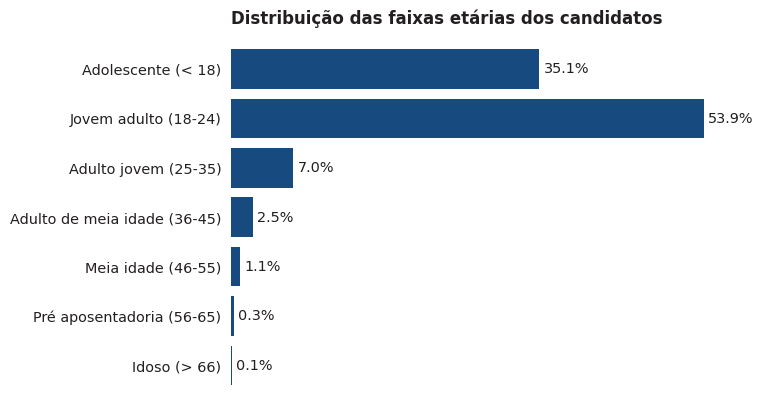

In [40]:
# Group the data by age bin.
age_grouped = performance_df.groupby(['faixa_etaria'])[['faixa_etaria']].count().rename(columns={'faixa_etaria': 'count'}).reset_index()
age_grouped['pct'] = round(age_grouped['count'] / np.sum(age_grouped['count']) * 100, 2) 
age_grouped['limit_age'] = age_grouped['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grouped = age_grouped.sort_values(by=['limit_age'], ascending=False).reset_index(drop=True)

# Plot.
barh_plot(age_grouped, 'faixa_etaria', 'pct', 
          'Distribuição das faixas etárias dos candidatos', range(len(age_grouped)), figsize=(6.4, 4.8))

- É possível perceber que 89% dos candidatos têm até 24 anos, sendo adolescentes ou jovens adultos. Idosos e pessoas perto da idade de aposentadoria representam apenas 0.4% dessa população.

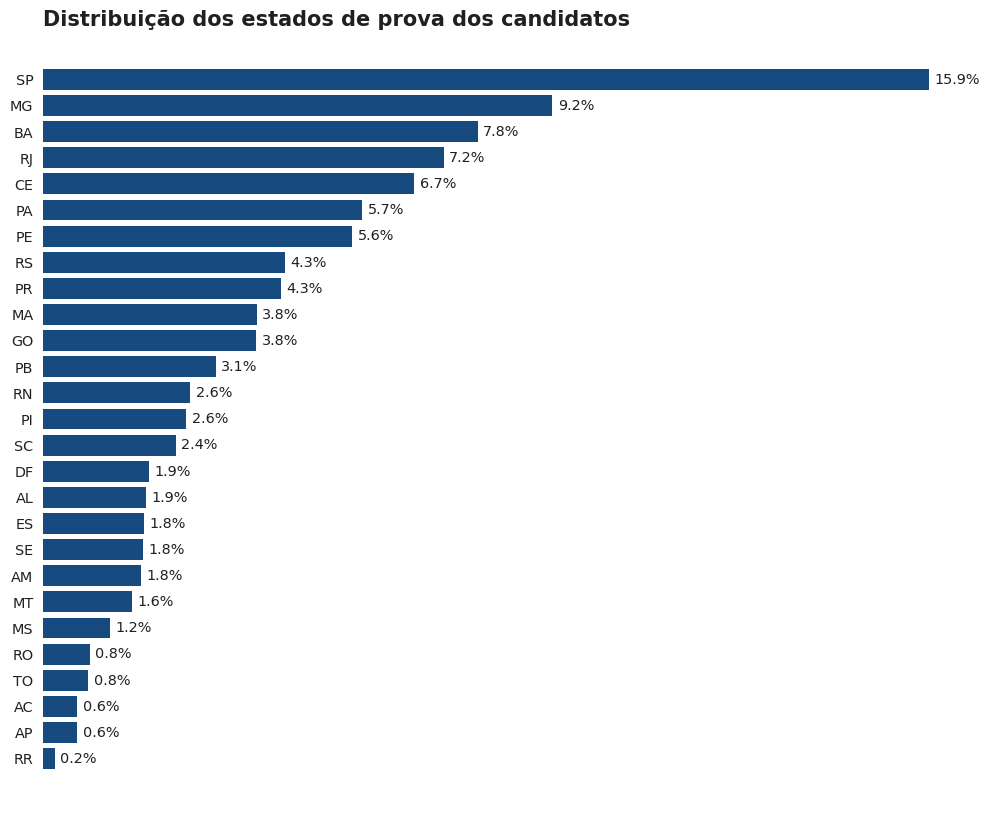

In [358]:
# Grouping the data by uf.
uf_grouped = performance_df.groupby(['uf_prova'])[['uf_prova']].count().rename(columns={'uf_prova': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
uf_grouped['pct'] = round(uf_grouped['count'] / np.sum(uf_grouped['count']) * 100, 2) 

barh_plot(uf_grouped, 'uf_prova', 'pct', 'Distribuição dos estados de prova dos candidatos', 
          range(len(uf_grouped)), figsize=(12, 10), text_space=0.1, title_fontsize=15, invert_yaxis=True)

- É possível perceber que São Paulo é o estado com o maior número de candidatos, representando 15.92% do total, enquanto estados do norte, como RO, TO, AP, AC e RR não concentram nem 1% da população de candidatos cada.

In [97]:
(performance_df['escola'].value_counts(normalize=True) * 100).to_frame()

,proportion
escola,
Não respondeu,59.155510
Pública,32.448206
Privada,8.396284


In [98]:
(performance_df['estado_civil'].value_counts(normalize=True) * 100).to_frame()

,proportion
estado_civil,
Solteiro(a),92.323173
Casado(a)/União Estável,3.337182
Não informado,3.115928
Divorciado(a)/Separado(a),1.145971
Viúvo(a),0.077746


In [99]:
(performance_df['treineiro'].value_counts(normalize=True) * 100).to_frame()

,proportion
treineiro,
Não,82.213156
Sim,17.786844


In [100]:
(performance_df['numero_pessoas_em_casa'].value_counts(normalize=True) * 100).to_frame()

,proportion
numero_pessoas_em_casa,
4,35.067423
3,28.151165
5,15.021688
2,12.121555
6,4.772514
1,2.009661
7,1.668527
8,0.670967
9,0.250253


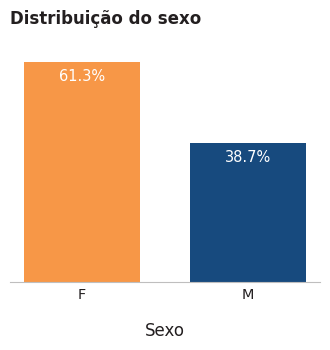

In [363]:
# Grouping the data by sex.
sex_grouped = performance_df.groupby(['sexo'])[['sexo']].count().rename(columns={'sexo': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
sex_grouped['pct'] = round(sex_grouped['count'] / np.sum(sex_grouped['count']) * 100, 2) 

bar_plot(sex_grouped, 'sexo', 'pct', 'Distribuição do sexo', 'Sexo', 
         figsize=(4, 3), title_pad=20, barwidth=0.7, 
         bar_color=[LARANJA1, AZUL1], invert_xaxis=False)

- 61% dos candidatos são mulheres, enquanto 39% são homens.

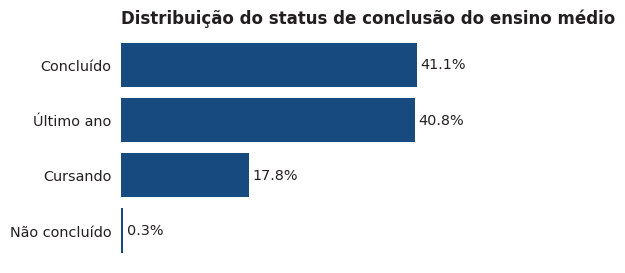

In [364]:
# Grouping the data by sex.
st_grouped = performance_df.groupby(['status_conclusao_ensino_medio'])[['status_conclusao_ensino_medio']].count().rename(columns={'status_conclusao_ensino_medio': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
st_grouped['pct'] = round(st_grouped['count'] / np.sum(st_grouped['count']) * 100, 2) 

barh_plot(st_grouped, 'status_conclusao_ensino_medio', 'pct', 
          title='Distribuição do status de conclusão do ensino médio', 
          ytick_range=(range(len(st_grouped))), invert_yaxis=True, figsize=(4, 3))

- Aproximadamente 82% dos candidatos já concluíram o ensino médio ou estão no último ano. Os 17.79% cursando representam treineiros, enquanto menos de 1% não concluíram nem estão cursando.

#### 4.2 Distribuição do comparecimento em provas

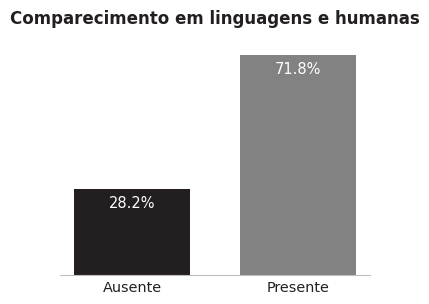

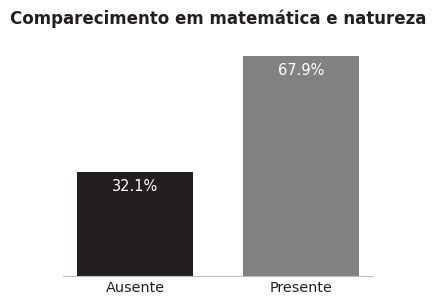

In [483]:
# Languages.
plc_grouped = absent_df.groupby(['presenca_lc'])[['presenca_lc']].count().rename(columns={'presenca_lc': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
plc_grouped['pct'] = round(plc_grouped['count'] / np.sum(plc_grouped['count']) * 100, 2) 

# Human sciences.
pch_grouped = absent_df.groupby(['presenca_ch'])[['presenca_ch']].count().rename(columns={'presenca_ch': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pch_grouped['pct'] = round(pch_grouped['count'] / np.sum(pch_grouped['count']) * 100, 2) 

# Math.
pmt_grouped = absent_df.groupby(['presenca_mt'])[['presenca_mt']].count().rename(columns={'presenca_mt': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pmt_grouped['pct'] = round(pmt_grouped['count'] / np.sum(pmt_grouped['count']) * 100, 2) 

# Nature sciences.
pcn_grouped = absent_df.groupby(['presenca_cn'])[['presenca_cn']].count().rename(columns={'presenca_cn': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
pcn_grouped['pct'] = round(pcn_grouped['count'] / np.sum(pcn_grouped['count']) * 100, 2) 

bar_plot(plc_grouped, 'presenca_lc', 'pct', 
         title='Comparecimento em linguagens e humanas',
         xlabel='', figsize=(4, 3), barwidth=0.7, bar_color=[CINZA6, CINZA1],
         title_pad=15, invert_xaxis=True, title_loc='center', label_size=12)

bar_plot(pmt_grouped, 'presenca_mt', 'pct', 
         title='Comparecimento em matemática e natureza',
         xlabel='', figsize=(4, 3), barwidth=0.7, bar_color=[CINZA6, CINZA1],
         title_pad=15, invert_xaxis=True, title_loc='center', label_size=12)

- É possível perceber uma taxa de desistência 4% maior nas provas do segundo dia, totalizando 32.13% de candidatos que não foram. Isso pode indicar uma maior dificuldade dos estudantes em ciências exatas, as quais compõem as provas do segundo dia. De qualquer forma, ambos os dias apresentam uma alta taxa de desistência, o que é preocupante e revela como a educação brasileira ainda é precária. Há uma discrepância entre o nível do exame e o nível intelectual dos alunos. É provável que grande parte das desistências ocorram por despreparo/falta de confiança para realizar a prova e não por razões randômicas.

#### 4.3 Distribuição das notas nas provas objetivas e na redação

In [22]:
performance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
nota_cn,2344823.0,496.016968,71.939621,0.0,440.600006,485.700012,543.400024,875.299988
nota_ch,2344823.0,529.968689,79.620689,0.0,480.200012,532.599976,584.099976,839.200012
nota_lc,2344823.0,519.876770,76.218857,0.0,471.399994,527.799988,574.900024,801.000000
nota_mt,2344823.0,542.611328,115.957680,0.0,449.100006,531.000000,622.500000,985.700012
nota_comp1,2344823.0,121.078514,35.226154,0.0,120.000000,120.000000,140.000000,200.000000
nota_comp2,2344823.0,143.334595,51.874409,0.0,120.000000,140.000000,200.000000,200.000000
nota_comp3,2344823.0,116.739243,39.584866,0.0,100.000000,120.000000,140.000000,200.000000
nota_comp4,2344823.0,131.489212,40.973282,0.0,120.000000,120.000000,160.000000,200.000000
nota_comp5,2344823.0,116.308472,58.901264,0.0,80.000000,120.000000,160.000000,200.000000
nota_redacao,2344823.0,628.950195,204.130585,0.0,540.000000,640.000000,780.000000,1000.000000


- A nota média geral para alunos que estavam presentes em ambos os dias é aproximadamente 543.
- A nota média máxima no ENEM de 2022 foi de aproximadamente 856.
- Analisando os percentis, metade dos alunos obtiveram uma nota de até 540, enquanto 75% obtiveram uma nota de até 602.
- A nota média em linguagens é aproximadamente 520. A nota média em ciências humanas é aproximadamente 530.
- Observando os percentis, metade dos candidatos obtém uma nota de até 528 em linguagens e 533 em ciências humanas.
- A nota média em ciências da natureza é aproximadamente 496. A nota média em matemática é aproximadamente 543.
- Observando os percentis, metade dos candidatos obtém uma nota de até 486 em ciências da natureza e 531 em matemática.
- A nota média na redação é aproximadamente 629. Entretanto, esse valor pode variar bastante, com um desvio padrão de 204. Os candidatos tendem a performar melhor na competência 2, em relação às outras competências.
- Analisando a mediana, metade dos candidatos obtiveram mais de 640 pontos na redação.
- Observando os valores máximos e mínimos, não há notas incoerentes.
- Alguns alunos têm nota média 0, representando o valor mínimo. Isso ocorre em situações em que o aluno foi realizar o exame, ou seja, estava presente, mas deixou o gabarito ou a redação em branco, por exemplo.
- Claramente, os alunos em geral não performam bem no exame e há uma distorção entre o nível do ENEM e o nível do que é ensinado nas escolas.

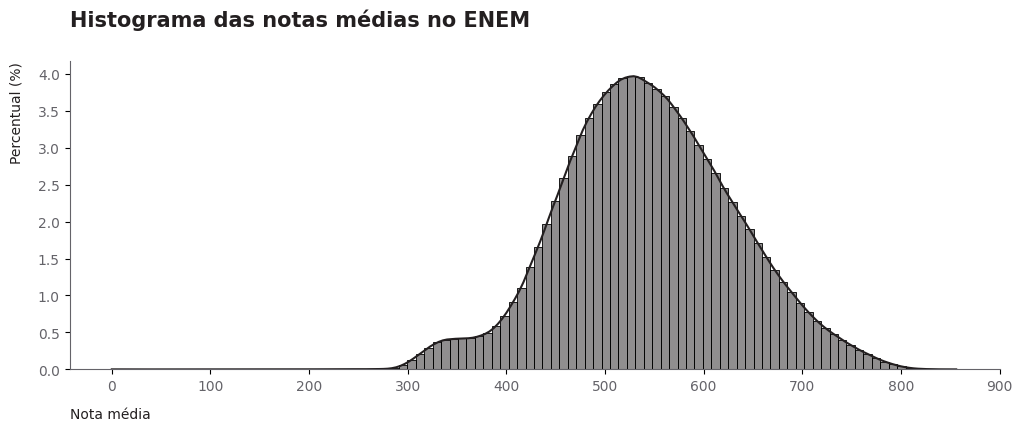

In [144]:
histogram_plot(performance_df, 'nota_media', 'Histograma das notas médias no ENEM',
               'Nota média', 'Percentual (%)', label_color=CINZA1, spines_ticks_colors=CINZA4, hist_color=CINZA1, 
               figsize=(12, 4), bins=100, title_pad=25, title_size=15, labelpad=10, kde=True)

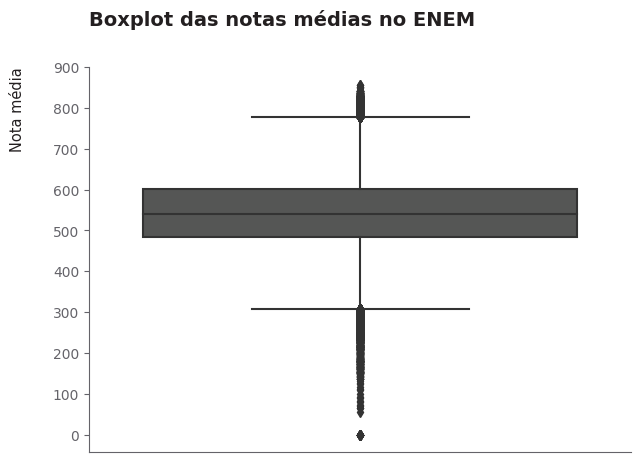

In [138]:
univariate_boxplot(performance_df, y='nota_media', xlabel='', ylabel='Nota média', title='Boxplot das notas médias no ENEM', 
        figsize=(7, 5), xaxis=False, pad=30, boxplot_color=CINZA3, y_step=100, title_size=14, label_size=10.5, tick_size=10)

- Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo, e candidatos que gabaritam a prova, ficando com uma nota elevada. Portanto, outliers não serão removidos.

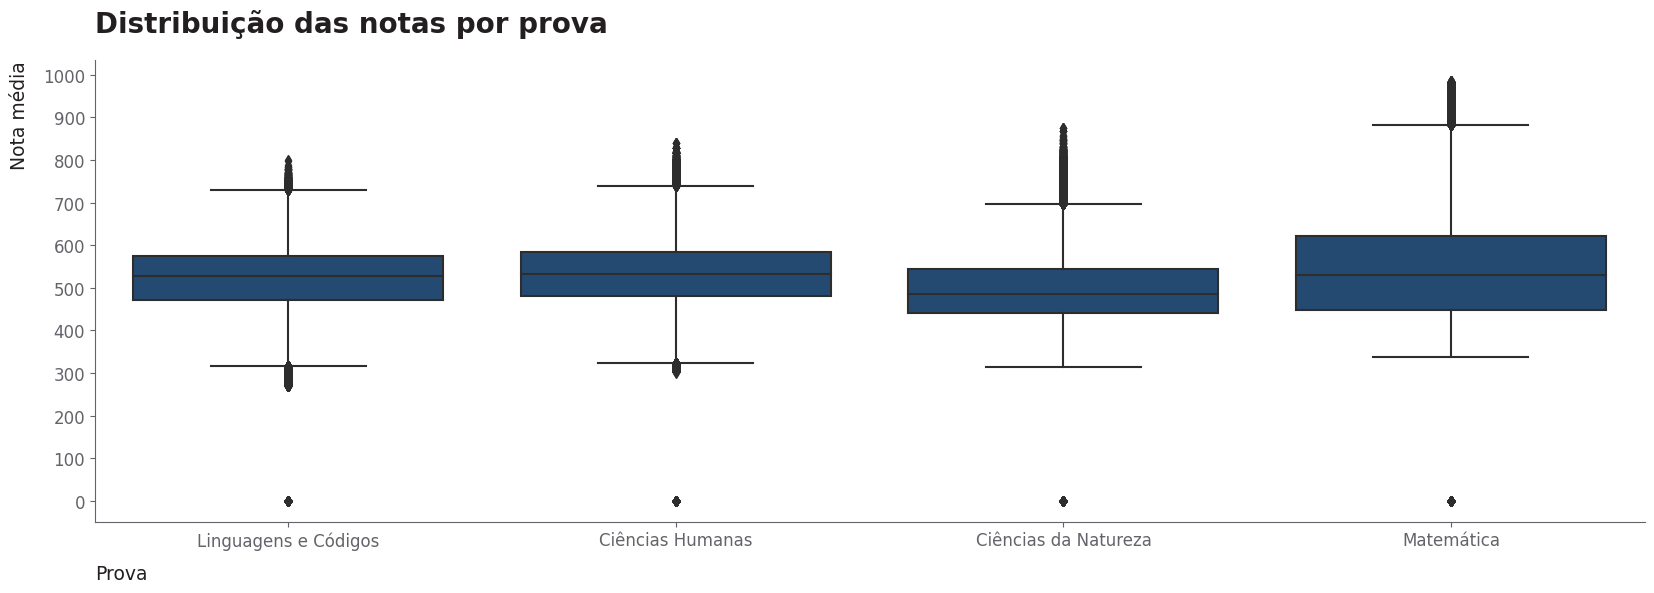

In [140]:
objective_exams = performance_df[['nota_lc', 'nota_ch', 'nota_cn', 'nota_mt']]

bivariate_boxplot(objective_exams, title='Distribuição das notas por prova', 
        xlabel='Prova', xtick_range=range(4), xtick_labels=['Linguagens e Códigos', 
                                                            'Ciências Humanas', 'Ciências da Natureza', 'Matemática'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_color=AZUL1, figsize=(20, 6), title_size=20, labelpad=10,
        label_size=13.5, tick_size=12)

- Analisando as distribuições, os candidatos tendem a ir melhor nas provas do primeiro dia, sendo ciências da natureza a área do conhecimento em que é apresentado o pior desempenho. Matemática apresenta o melhor desempenho médio entre as provas. Entretanto, isso se deve ao modelo do ENEM, em que naturalmente essa área do conhecimento fornece uma nota maior aos candidatos. Isso pode ser verificado observando a nota máxima em matemática, que é consideravelmente maior em relação as outras.
- De forma geral, todas as notas apresentam outliers acima e abaixo dos limites superior e inferior. Entretanto, estes não representam informação incoerente, uma vez que naturalmente alguns candidatos irão tirar zero (apesar de estarem presentes, provavelmente esses candidatos deixaram o gabarito em branco, ou algo relacionado), enquanto outros irão gabaritar a prova, atingindo a nota máxima. Portanto, outliers não serão removidos.

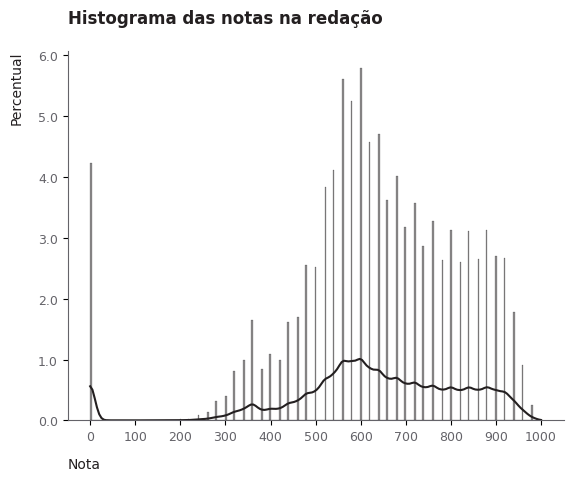

In [400]:
histogram_plot(performance_df, 'nota_redacao', title='Histograma das notas na redação',
               xlabel='Nota', ylabel='Percentual', hist_color=CINZA1, labelpad=10,
               label_size=10, tick_size=9)

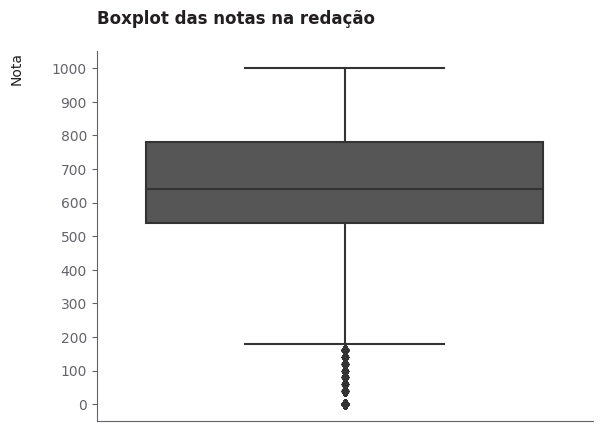

In [145]:
univariate_boxplot(performance_df, title='Boxplot das notas na redação', y='nota_redacao',
                   xlabel='', ylabel='Nota', xaxis=False, y_step=100, boxplot_color=CINZA3)

- Os outliers não representam valores inconsistentes, uma vez que naturalmente haverá candidatos com notas abaixo do normal, em virtude do seu despreparo e dos pontos citados acima. Portanto, outliers não serão removidos.

In [26]:
performance_df['lingua'].value_counts(normalize=True).to_frame() * 100

,proportion
lingua,
Inglês,57.898699
Espanhol,42.101301


- A maioria dos alunos escolhe o Inglês como língua estrangeira para realizar a prova.

#### 4.4 Distribuição das variáveis socioeconômicas

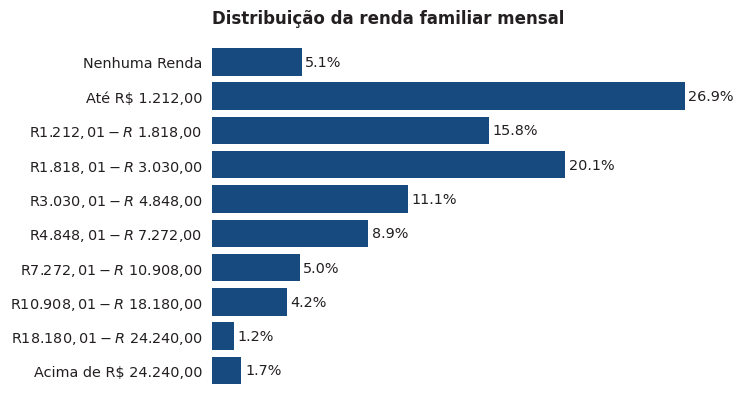

In [73]:
# Group the data by income.
income_grouped = performance_df.groupby(['renda_familiar_mensal'])[['renda_familiar_mensal']].count().rename(columns={'renda_familiar_mensal': 'count'}).reset_index()
income_grouped['pct'] = round(income_grouped['count'] / np.sum(income_grouped['count']) * 100, 2) 
income_grouped['income_unique'] = income_grouped['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_grouped = income_grouped.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_grouped, 'renda_familiar_mensal', 'pct',
          'Distribuição da renda familiar mensal', 
          ytick_range=range(len(income_grouped)), invert_yaxis=True, text_space=0.2)

- É possível perceber que 67.9% dos candidatos possuem uma renda familiar mensal de até R$ 3030.00, incluindo aqueles que não possuem nenhuma renda (5.1%).

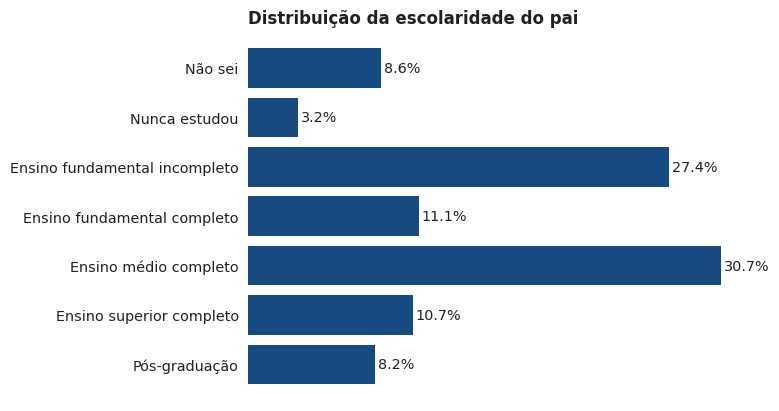

In [409]:
# Group the data by escolaridade pai.
esc_pai_grouped = performance_df.groupby(['escolaridade_pai'])[['escolaridade_pai']].count().rename(columns={'escolaridade_pai': 'count'}).reset_index()
esc_pai_grouped['pct'] = round(esc_pai_grouped['count'] / np.sum(esc_pai_grouped['count']) * 100, 2) 
esc_pai_grouped['order_escolaridade'] = esc_pai_grouped['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_pai_grouped = esc_pai_grouped.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_pai_grouped, 'escolaridade_pai', 'pct',
          title='Distribuição da escolaridade do pai', ytick_range=range(len(esc_pai_grouped)),
          invert_yaxis=True, text_space=0.2)

- É possível perceber que quase metade (41.7 %) dos pais dos candidatos não possuem ensino médio completo. Ademais, aproximadamente 19% chegaram a concluir o ensino superior. Chama a atenção o alto percentual de pais que não concluíram o ensino fundamental, representando 27.4% da amostra.

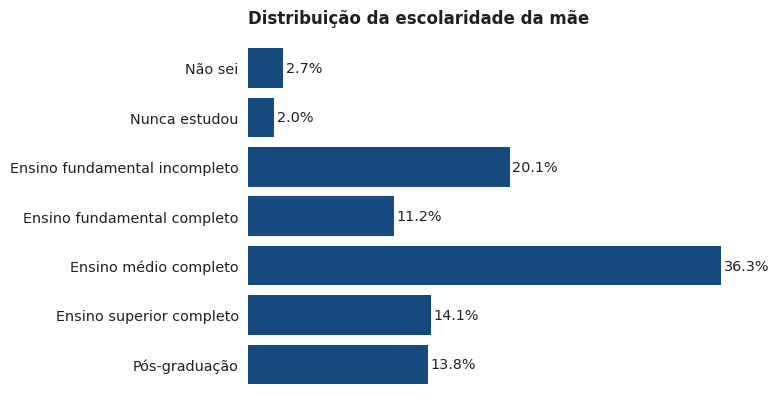

In [410]:
# Group the data by escolaridade mae.
esc_mae_grouped = performance_df.groupby(['escolaridade_mae'])[['escolaridade_mae']].count().rename(columns={'escolaridade_mae': 'count'}).reset_index()
esc_mae_grouped['pct'] = round(esc_mae_grouped['count'] / np.sum(esc_mae_grouped['count']) * 100, 2) 
esc_mae_grouped['order_escolaridade'] = esc_mae_grouped['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_mae_grouped = esc_mae_grouped.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_mae_grouped, 'escolaridade_mae', 'pct',
          title='Distribuição da escolaridade da mãe', ytick_range=range(len(esc_mae_grouped)),
          invert_yaxis=True, text_space=0.2)

- É possível perceber que 33.3% das mães dos candidatos não chegaram a concluir o ensino médio. Entretanto, o nível de escolaridade das mães é claramente superior ao dos pais. Para elas, 27.9% chegaram a concluir o ensino superior, contra 19% para os pais, por exemplo. Ademais, um percentual considerável possui ensino médio completo, 36.3%.

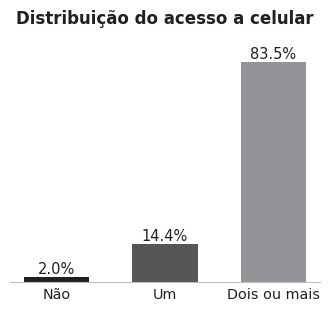

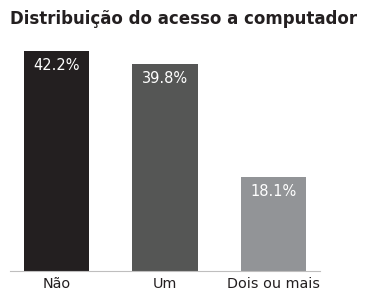

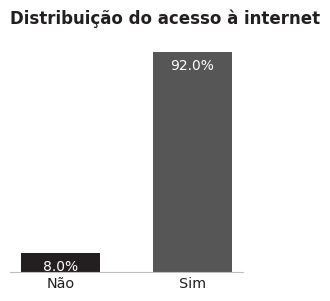

In [476]:
# Group the data by possui_celular_em_casa.
celular_grouped = performance_df.groupby(['possui_celular_em_casa'])[['possui_celular_em_casa']].count().rename(columns={'possui_celular_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
celular_grouped['pct'] = round(celular_grouped['count'] / np.sum(celular_grouped['count']) * 100, 2) 
celular_grouped = celular_grouped.sort_values(by=['pct'], ascending=True)

bar_plot(celular_grouped, 'possui_celular_em_casa', 'pct', 
         title='Distribuição do acesso a celular', xlabel='',
         figsize=(4, 3), top_annotation=True, title_pad=20,
         bar_color=[CINZA1, CINZA3, CINZA7], title_loc='center')

# Group the data by possui_computador_em_casa.
computador_grouped = performance_df.groupby(['possui_computador_em_casa'])[['possui_computador_em_casa']].count().rename(columns={'possui_computador_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
computador_grouped['pct'] = round(computador_grouped['count'] / np.sum(computador_grouped['count']) * 100, 2) 

bar_plot(computador_grouped, 'possui_computador_em_casa', 'pct', 
         title='Distribuição do acesso a computador', xlabel='',
         figsize=(4, 3), top_annotation=False, title_pad=12,
         bar_color=[CINZA1, CINZA3, CINZA7], title_loc='left')

# Group the data by acesso_internet_em_casa.
internet_grouped = performance_df.groupby(['acesso_internet_em_casa'])[['acesso_internet_em_casa']].count().rename(columns={'acesso_internet_em_casa': 'count'}).reset_index().sort_values(by=['count'], ascending=False)
internet_grouped['pct'] = round(internet_grouped['count'] / np.sum(internet_grouped['count']) * 100, 2) 
internet_grouped = internet_grouped.sort_values(by=['pct'], ascending=True)

bar_plot(internet_grouped, 'acesso_internet_em_casa', 'pct', 
         title='Distribuição do acesso à internet', xlabel='',
         figsize=(3, 3), top_annotation=False, title_pad=12,
         bar_color=[CINZA1, CINZA3], title_loc='left', text_fontsize=10)

- Surpreendentemente, 42.16% dos candidatos não possuem computador em casa. Esse dado nos revela uma dificuldade e disparidade de condições dos estudantes, já que um computador com acesso a internet é a melhor ferramenta para estudos atualmente. Será que há uma diferença significativa nas notas daqueles que possuem computador em casa em relação aos que não detêm esse bem?
- 83.55% dos candidatos possuem dois celulares ou mais em casa. Este é um bem mais acessível e portanto mais comum nas famílias.
- 91.96% dos candidatos possuem acesso a internet em casa. Embora seja um baixo percentual, ainda é alarmante o fato de que aproximadamente 8% dos estudantes não possuem sequer internet para se preparar. Considerando um exame desse porte, isso representa um grande número de pessoas.

#### 5. Análises bivariada e multivariada
- Nesta etapa realizarei agregações e manipulações nos dados de forma a responder perguntas envolvendo duas ou mais variáveis.
- Agora, dividirei a minha análise em Análise de Desempenho e Análise de Abstenção, a fim de responder as perguntas mencionadas no começo deste notebook.

#### 6. Análise de Desempenho
- Entre os objetivos da Análise de Desmpenho estão, entender qual o perfil dos candidatos que obtêm determinados resultados, quais variáveis se relacionam com a nota geral e como estas poderiam impactar em uma futura tarefa de predição. 
- A métrica em foco será a nota geral, que consiste na média das notas nas 5 provas - Linguagens, Ciências Humanas, Ciências da Natureza, Matemática e Redação. 
- Portanto, serão utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo.
- Perguntas respondidas na Análise de Desempenho:
    - Quem apresenta melhor desempenho, pessoas do sexo masculino ou feminino?
    - Existem diferenças no desempenho para pessoas de diferentes faixas etárias?
    - Em média, quais os estados com as maiores e as menores notas gerais?
    - Como a renda influencia o desempenho do candidato?
    - Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
    - De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho do candidato?

#### 6.1 Quem apresenta melhor desempenho, pessoas do sexo masculino ou feminino?

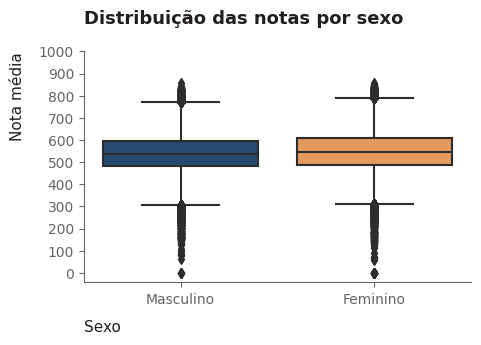

In [115]:
bivariate_boxplot(performance_df, title='Distribuição das notas por sexo', 
        xlabel='Sexo', xtick_range=range(2), xtick_labels=['Masculino', 'Feminino'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[AZUL1, LARANJA1], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=11, tick_size=10, y='nota_media', x='sexo')


- Pessoas do sexo masculino e feminino não apresentam diferenças significativas na nota obtida no ENEM.

#### 6.2 Existem diferenças no desempenho para pessoas de diferentes faixas etárias?

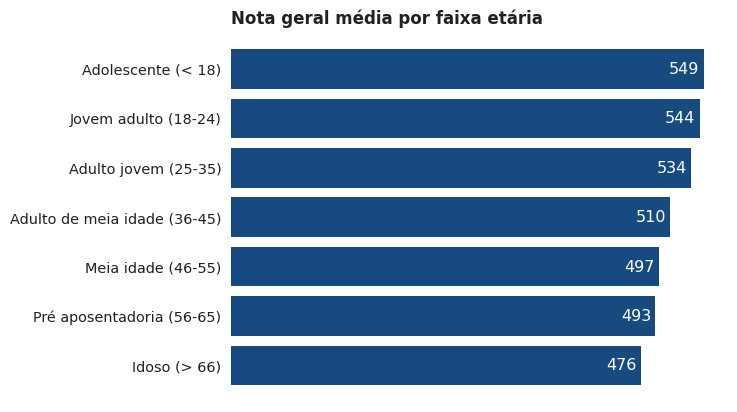

In [94]:
age_grade = performance_df.groupby(['faixa_etaria'])[['nota_media']].mean().reset_index()
age_grade['limit_age'] = age_grade['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_grade = age_grade.sort_values(by=['limit_age'], ascending=True).reset_index(drop=True)

barh_plot(age_grade, 'faixa_etaria', 'nota_media',
          title='Nota geral média por faixa etária', ytick_range=range(len(age_grade)),
          invert_yaxis=True, text_space=-40, text_color=BRANCO, text_size=11.5, mean=True)

- Em média, pessoas mais jovens tendem a apresentar uma nota geral maior que a de pessoas mais velhas.

#### 6.3 Em média, quais os estados com as maiores e as menores notas gerais?

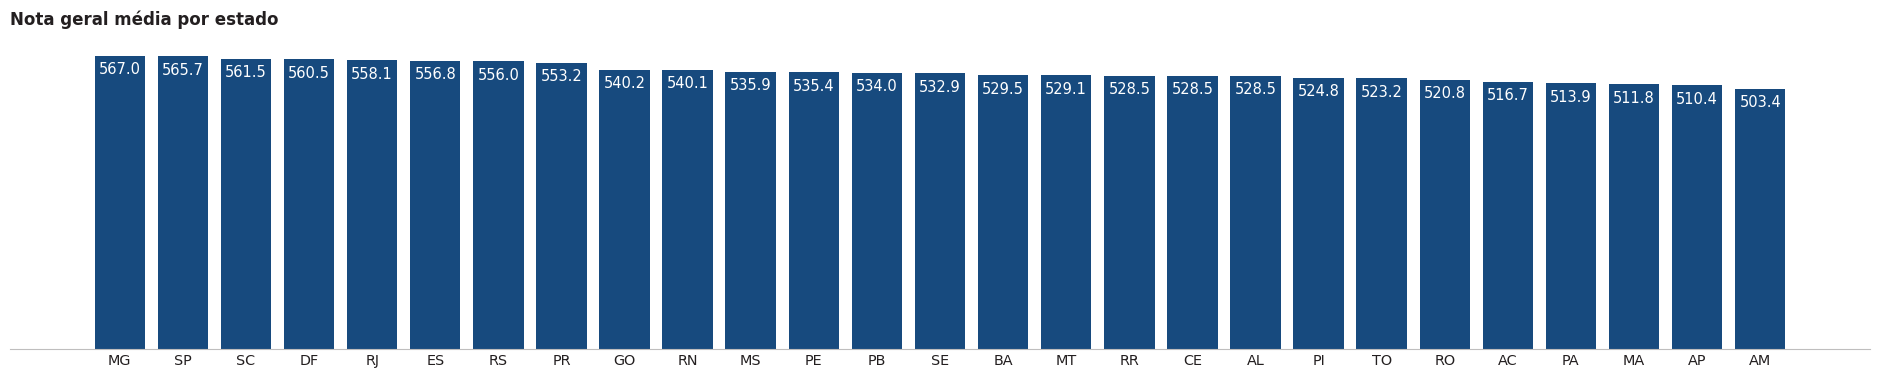

In [61]:
# Group the data by uf.
uf_grade = performance_df.groupby(['uf_prova'])[['nota_media']].mean().reset_index().sort_values(by=['nota_media'], ascending=False)

bar_plot(uf_grade, 'uf_prova', 'nota_media', 
         title='Nota geral média por estado', xlabel='',
         figsize=(24, 4), top_annotation=False, title_pad=12,
         bar_color=AZUL1, title_loc='left', barwidth=0.8, mean=True)

- Em média, estados do sul e sudeste possuem as maiores notas gerais. Com destaque para Minas Gerais e São Paulo, sendo os dois melhores nesse quesito. O Distrito Federal (Brasília) é a exceção dentre as outras regiões, estando em quarto lugar. A diferença torna-se ainda maior à medida que caminhamos para o norte, sendo o Amazonas o estado com a pior nota de todas, estando aproximadamente 64 pontos abaixo de minas.

#### 6.4 Como a renda influencia o desempenho do candidato?

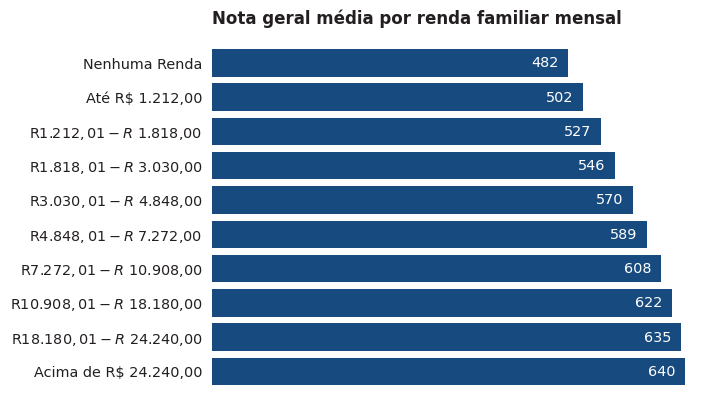

In [108]:
# Group the data by income.
income_grade = performance_df.groupby(['renda_familiar_mensal'])[['nota_media']].mean().reset_index()
income_grade['income_unique'] = income_grade['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_grade = income_grade.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

barh_plot(income_grade, 'renda_familiar_mensal', 'nota_media',
          title='Nota geral média por renda familiar mensal', ytick_range=range(len(income_grade)),
          invert_yaxis=True, text_space=-50, text_color=BRANCO, mean=True)

- É possível perceber que, em média, quanto maior a renda familiar mensal, maior a nota geral do candidato. Candidatos com renda acima de R$ 24.240,00 obtiveram uma nota geral média 1.33 vezes maior que candidatos com nenhuma renda, totalizando uma diferença absoluta de aproximadamente 157 pontos.

#### 6.5 Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?

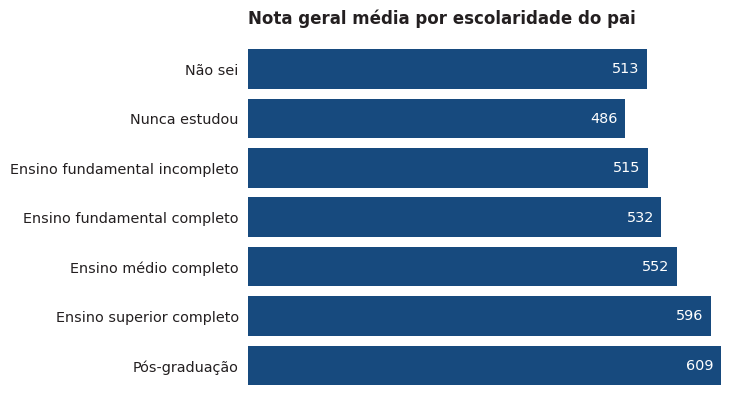

In [107]:
# Group the data by escolaridade pai.
esc_pai_grade = performance_df.groupby(['escolaridade_pai'])[['nota_media']].mean().reset_index()
esc_pai_grade['order_escolaridade'] = esc_pai_grade['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_pai_grade = esc_pai_grade.sort_values(by=['order_escolaridade'], ascending=True)


barh_plot(esc_pai_grade, 'escolaridade_pai', 'nota_media',
          title='Nota geral média por escolaridade do pai', ytick_range=range(len(esc_pai_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True)

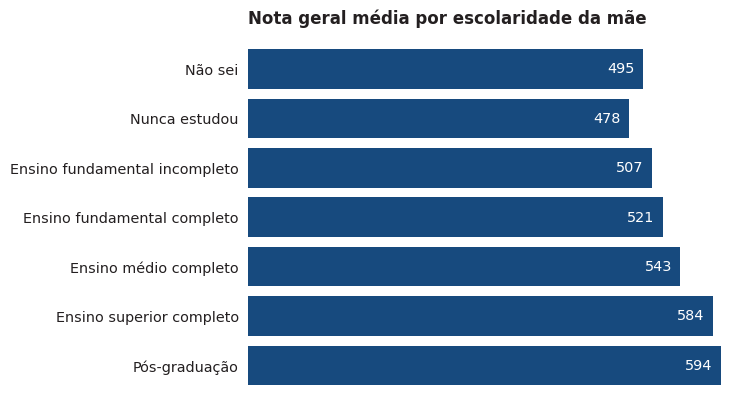

In [106]:
# Group the data by escolaridade pai.
esc_mae_grade = performance_df.groupby(['escolaridade_mae'])[['nota_media']].mean().reset_index()
esc_mae_grade['order_escolaridade'] = esc_mae_grade['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
esc_mae_grade = esc_mae_grade.sort_values(by=['order_escolaridade'], ascending=True)

barh_plot(esc_mae_grade, 'escolaridade_mae', 'nota_media',
          title='Nota geral média por escolaridade da mãe', ytick_range=range(len(esc_mae_grade)),
          invert_yaxis=True, text_space=-45, text_color=BRANCO, mean=True)

- Claramente, quanto maior a escolaridade do pai ou da mãe, melhor o desempenho do candidato.

#### 6.6 De que forma a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa impactam o desempenho dos candidatos?

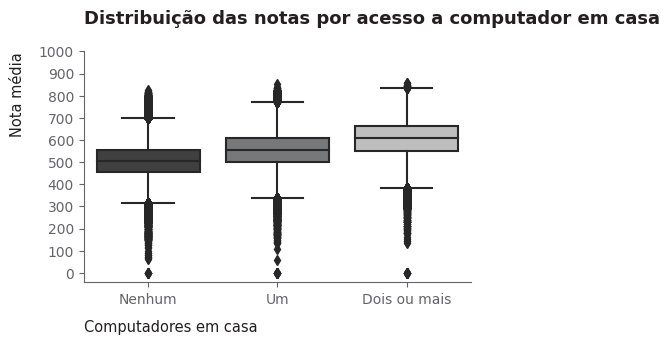

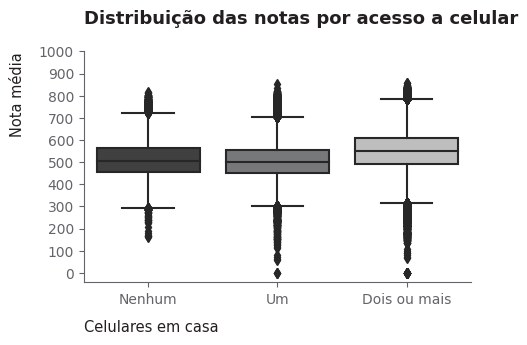

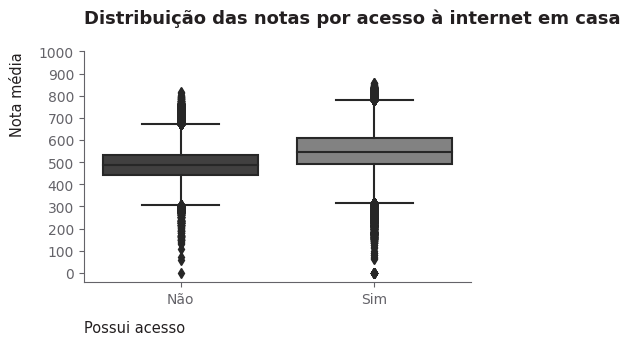

In [133]:
bivariate_boxplot(performance_df, title='Distribuição das notas por acesso a computador em casa', 
        xlabel='Computadores em casa', xtick_range=range(3), xtick_labels=['Nenhum', 'Um', 'Dois ou mais'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[CINZA2, CINZA5, CINZA9], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='possui_computador_em_casa', order=['Não', 'Um', 'Dois ou mais'], title_loc='left')

bivariate_boxplot(performance_df, title='Distribuição das notas por acesso a celular', 
        xlabel='Celulares em casa', xtick_range=range(3), xtick_labels=['Nenhum', 'Um', 'Dois ou mais'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[CINZA2, CINZA5, CINZA9], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='possui_celular_em_casa', order=['Não', 'Um', 'Dois ou mais'], title_loc='left')

bivariate_boxplot(performance_df, title='Distribuição das notas por acesso à internet em casa', 
        xlabel='Possui acesso', xtick_range=range(2), xtick_labels=['Não', 'Sim'],
        ylabel='Nota média', ytick_labels=range(0, 1001, 100), y_step=100, boxplot_palette=[CINZA2, CINZA6], figsize=(5, 3), title_size=13, labelpad=10,
        label_size=10.5, tick_size=10, y='nota_media', x='acesso_internet_em_casa', order=['Não', 'Sim'])

- Candidatos com um ou mais celulares em casa tendem a obter uma nota geral maior que aqueles que não possuem o dispositivo.
- Candidatos com um ou mais computadores em casa tendem a obter uma nota geral maior que aqueles que não possuem o dispositivo.
- Candidatos com acesso a internet em casa tendem a obter uma nota geral maior que aqueles que não possuem o recurso.

#### 6.7 Em quais regiões estão concentrados os alunos que não possuem acesso a recursos tecnológicos (celular, computador e internet) em casa?

In [74]:
# Create a feature indicating the state's region.
def define_regions(states):
    region_mapping = {
                        'AC': 'Norte',
                        'AL': 'Nordeste',
                        'AP': 'Norte',
                        'AM': 'Norte',
                        'BA': 'Nordeste',
                        'CE': 'Nordeste',
                        'DF': 'Centro-Oeste',
                        'ES': 'Sudeste',
                        'GO': 'Centro-Oeste',
                        'MA': 'Nordeste',
                        'MT': 'Centro-Oeste',
                        'MS': 'Centro-Oeste',
                        'MG': 'Sudeste',
                        'PA': 'Norte',
                        'PB': 'Nordeste',
                        'PR': 'Sul',
                        'PE': 'Nordeste',
                        'PI': 'Nordeste',
                        'RJ': 'Sudeste',
                        'RN': 'Nordeste',
                        'RS': 'Sul',
                        'RO': 'Norte',
                        'RR': 'Norte',
                        'SC': 'Sul',
                        'SP': 'Sudeste',
                        'SE': 'Nordeste',
                        'TO': 'Norte'
                    }

    
    regions = [region_mapping[state] for state in states]
    return regions

performance_df['regiao'] = define_regions(performance_df['uf_prova'])
performance_df['regiao'].unique()

array(['Nordeste', 'Sudeste', 'Norte', 'Sul', 'Centro-Oeste'],
      dtype=object)

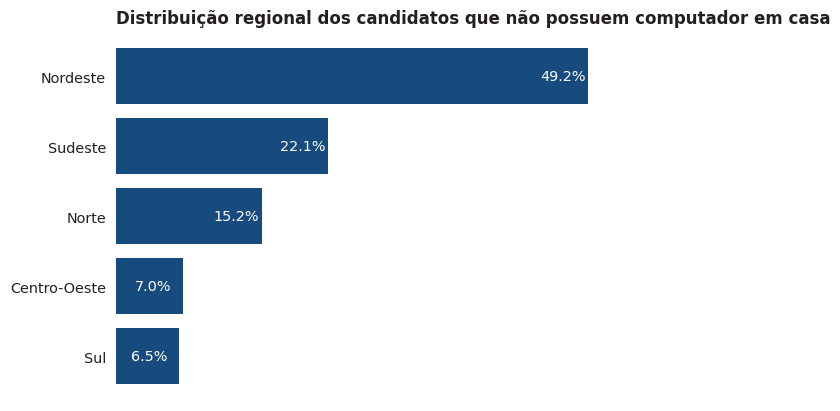

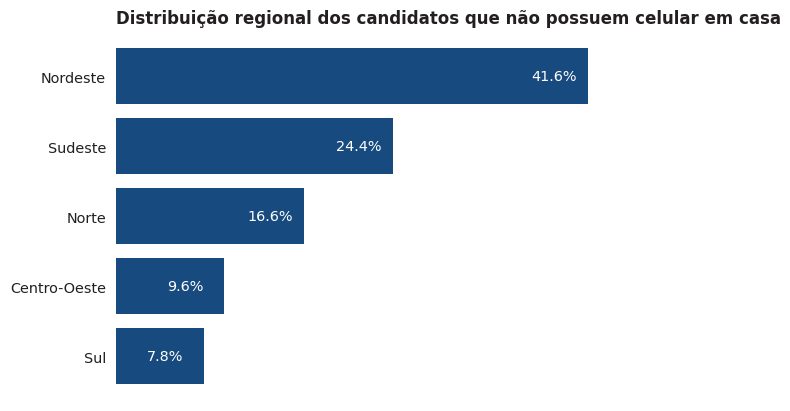

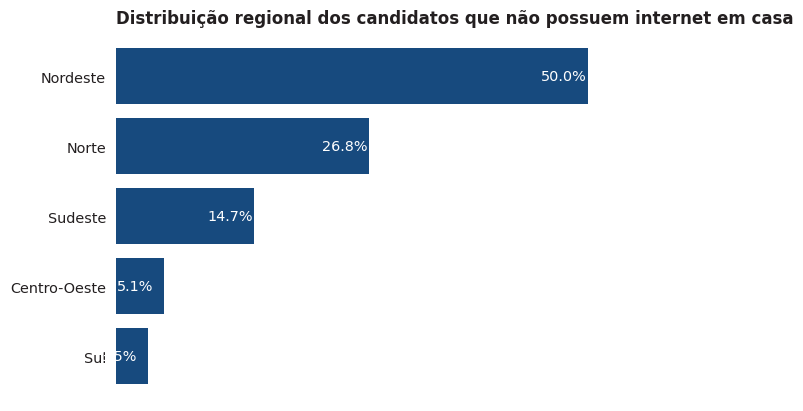

In [170]:
# Obtain and group the data by possui_computador_em_casa, possui_celular_em_casa e acesso_internet_em_casa
nao_pc = performance_df.loc[df['possui_computador_em_casa'] == 'Não']
nao_celular = performance_df.loc[df['possui_celular_em_casa'] == 'Não']
nao_internet = performance_df.loc[df['acesso_internet_em_casa'] == 'Não']

nao_pc_grouped = nao_pc.groupby(['regiao'])[['possui_computador_em_casa']].count().reset_index().rename(columns={'possui_computador_em_casa': 'count'}).sort_values(by=['count'], ascending=False)
nao_pc_grouped['pct'] = round(nao_pc_grouped['count'] / np.sum(nao_pc_grouped['count']) * 100, 2) 

nao_celular_grouped = nao_celular.groupby(['regiao'])[['possui_celular_em_casa']].count().reset_index().rename(columns={'possui_celular_em_casa': 'count'}).sort_values(by=['count'], ascending=False)
nao_celular_grouped['pct'] = round(nao_celular_grouped['count'] / np.sum(nao_celular_grouped['count']) * 100, 2) 

nao_internet_grouped = nao_internet.groupby(['regiao'])['acesso_internet_em_casa'].count().reset_index().rename(columns={'acesso_internet_em_casa': 'count'}).sort_values(by=['count'], ascending=False)
nao_internet_grouped['pct'] = round(nao_internet_grouped['count'] / np.sum(nao_internet_grouped['count']) * 100, 2)

barh_plot(nao_pc_grouped, 'regiao', 'pct',
          title='Distribuição regional dos candidatos que não possuem computador em casa', ytick_range=range(len(nao_pc_grouped)),
          invert_yaxis=True, text_space=-5, text_size=10.4, text_color=BRANCO)

barh_plot(nao_celular_grouped, 'regiao', 'pct',
          title='Distribuição regional dos candidatos que não possuem celular em casa', ytick_range=range(len(nao_celular_grouped)),
          invert_yaxis=True, text_space=-5, text_size=10.4, text_color=BRANCO)

barh_plot(nao_internet_grouped, 'regiao', 'pct',
          title='Distribuição regional dos candidatos que não possuem internet em casa', ytick_range=range(len(nao_internet_grouped)),
          invert_yaxis=True, text_space=-5, text_size=10.4, text_color=BRANCO)

- Metade dos candidatos que não possuem acesso a internet e computador em casa são da região nordeste do país. Para celular em casa, a taxa é similar, de 41.6%.

#### 6.8 Analisando a nota geral média em outras variáveis

In [20]:
performance_df.groupby(['escola'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
escola,
Privada,608.350403
Não respondeu,547.750183
Pública,518.923767


In [21]:
performance_df.groupby(['lingua'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
lingua,
Inglês,564.547058
Espanhol,514.519348


In [9]:
performance_df.groupby(['treineiro'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
treineiro,
Não,543.505249
Sim,543.389771


In [22]:
performance_df['numero_pessoas_em_casa'] = pd.cut(performance_df['numero_pessoas_em_casa'],
                                            bins=[1, 3, 5, 10, 20],
                                            labels=['1 a 3', '4 a 5', '6 a 10', '11 a 20'], include_lowest=True)
performance_df.groupby(['numero_pessoas_em_casa'])[['nota_media']].mean().sort_values(by=['nota_media'], ascending=False)

,nota_media
numero_pessoas_em_casa,
1 a 3,547.050720
4 a 5,544.993713
6 a 10,514.198120
11 a 20,490.536346


#### 7. Análise de Abstenção
- O objetivo da Análise de Abstenção é identificar os fatores que influenciam a ausência do candidato na prova. 
- Portanto, serão utilizados dados de todos os candidatos, dando foco aos que estavam ausentes.
- Perguntas respondidas na Análise de Abstenção:
    - A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?
    - A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?
    - A renda familiar mensal influencia a ausência do candidato na prova?
    - Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?
    - Existe alguma diferença na taxa de abstenção entre pessoas do sexo masculino e do sexo feminino?
    - Quais regiões apresentam as maiores e as menores taxas de abstenção?

#### 7.1 A falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciam a ausência do candidato na prova?

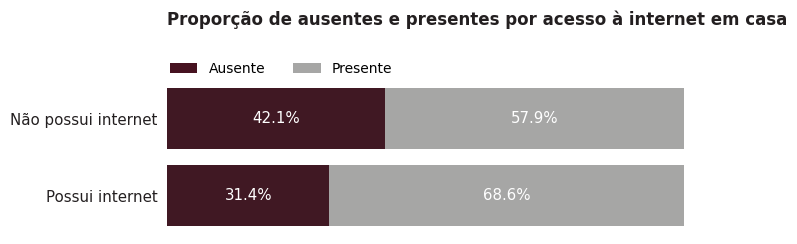

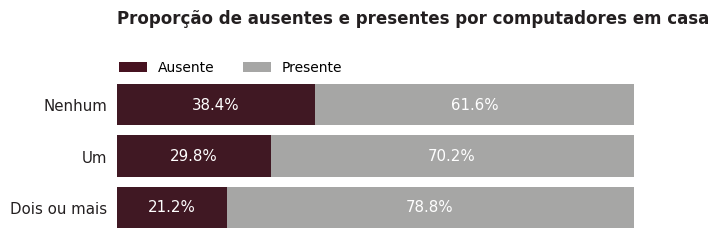

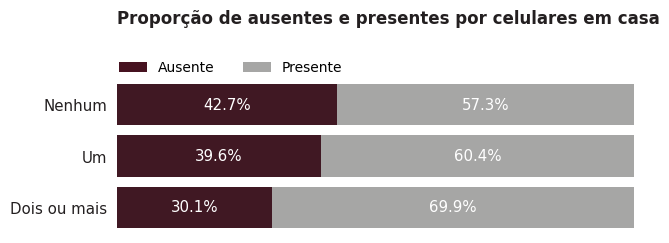

In [86]:
internet_absent = absent_df.groupby(['acesso_internet_em_casa'])[['presente']].mean().reset_index()
internet_absent['ausente'] = 1 - internet_absent['presente']

horizontal_stacked_bar_plot(internet_absent, second_x='presente', first_x='ausente', y='acesso_internet_em_casa', y_tick_range=range(len(internet_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=['Não possui internet', 'Possui internet'], title='Proporção de ausentes e presentes por acesso à internet em casa', title_pad=40, figsize=(7, 2),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.2, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8)


computer_absent = absent_df.groupby(['possui_computador_em_casa'])[['presente']].mean().reset_index()
computer_absent['ausente'] = 1 - computer_absent['presente']
computer_absent = computer_absent.sort_values(by=['ausente'], ascending=False)

order = computer_absent['possui_computador_em_casa'].tolist()

horizontal_stacked_bar_plot(computer_absent, second_x='presente', first_x='ausente', y='possui_computador_em_casa', y_tick_range=range(len(computer_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=['Nenhum', 'Um', 'Dois ou mais'], title='Proporção de ausentes e presentes por computadores em casa', title_pad=40, figsize=(7, 2),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.2, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, order=order)

celular_absent = absent_df.groupby(['possui_celular_em_casa'])[['presente']].mean().reset_index()
celular_absent['ausente'] = 1 - celular_absent['presente']
celular_absent = celular_absent.sort_values(by=['ausente'], ascending=False)

order = celular_absent['possui_celular_em_casa'].tolist()

horizontal_stacked_bar_plot(celular_absent, second_x='presente', first_x='ausente', y='possui_celular_em_casa', y_tick_range=range(len(computer_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=['Nenhum', 'Um', 'Dois ou mais'], title='Proporção de ausentes e presentes por celulares em casa', title_pad=40, figsize=(7, 2),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.2, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, order=order)

- Sim, a falta de acesso a recursos tecnológicos (celular, computador e internet) em casa influenciou o comparecimento do candidato na prova.
- A taxa de abstenção para candidatos que não possuem acesso a internet em casa é de 42.1%, contra 31.4% para aqueles que possuem.
- A taxa de abstenção para candidatos que não possuem computador em casa é de 38.4%, contra 21.2% e 29.8% para aqueles que possuem dois ou mais e um, respectivamente. É interessante a diferença de mais de 17% na abstenção entre os que não possuem computador e os que possuem dois ou mais.

#### 7.2 A escolaridade do pai e da mãe influenciam a ausência do candidato na prova?

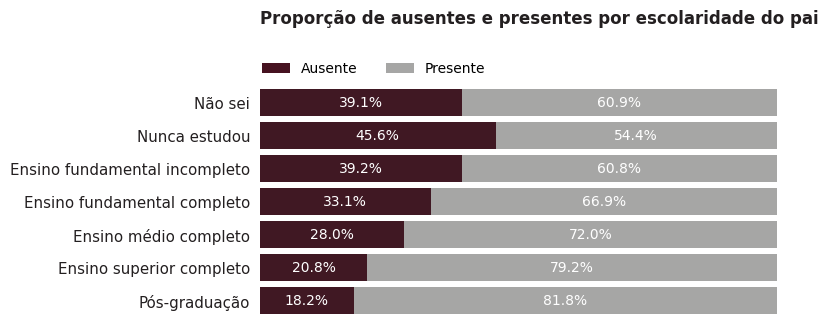

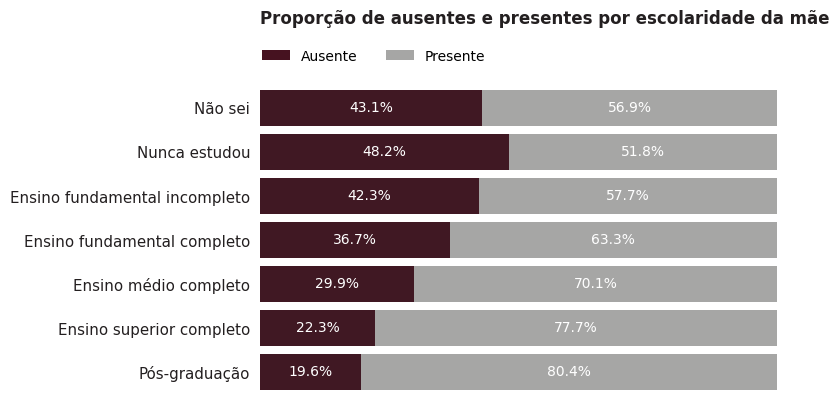

In [87]:
escolaridade_pai_absent = absent_df.groupby(['escolaridade_pai'])[['presente']].mean().reset_index()
escolaridade_pai_absent['ausente'] = 1 - escolaridade_pai_absent['presente']
escolaridade_pai_absent['order_escolaridade'] = escolaridade_pai_absent['escolaridade_pai'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
escolaridade_pai_absent = escolaridade_pai_absent.sort_values(by=['order_escolaridade'], ascending=True).reset_index(drop=True)
order = escolaridade_pai_absent['escolaridade_pai'].tolist()

horizontal_stacked_bar_plot(escolaridade_pai_absent, second_x='presente', first_x='ausente', y='escolaridade_pai', y_tick_range=range(len(escolaridade_pai_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=order, title='Proporção de ausentes e presentes por escolaridade do pai', title_pad=45, figsize=(7, 3),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.16, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, order=order, text_size=10)


escolaridade_mae_absent = absent_df.groupby(['escolaridade_mae'])[['presente']].mean().reset_index()
escolaridade_mae_absent['ausente'] = 1 - escolaridade_mae_absent['presente']
escolaridade_mae_absent['order_escolaridade'] = escolaridade_mae_absent['escolaridade_mae'].map({'Não sei': 0, 'Nunca estudou': 1, 'Ensino fundamental incompleto': 2, 'Ensino fundamental completo': 3, 'Ensino médio completo': 4, 'Ensino superior completo': 5, 'Pós-graduação': 6}).astype('int')
escolaridade_mae_absent = escolaridade_mae_absent.sort_values(by=['order_escolaridade'], ascending=True).reset_index(drop=True)

horizontal_stacked_bar_plot(escolaridade_mae_absent, second_x='presente', first_x='ausente', y='escolaridade_mae', y_tick_range=range(len(escolaridade_mae_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=order, title='Proporção de ausentes e presentes por escolaridade da mãe', title_pad=45, figsize=(7, 4),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.16, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, order=order, text_size=10)

- Sim, a escolaridade do pai e/ou da mãe influenciam o comparecimento do candidato na prova. Claramente, à medida que o nível de escolaridade aumenta, a taxa de abstenção cai.
- Por exemplo, analisando a escolaridade da mãe, é possível perceber que a taxa de abstenção entre candidatos cujas mães nunca estudaram é o dobro da taxa para aqueles cujas mães possuem pós graduação.

#### 7.3 A renda familiar mensal influencia a ausência do candidato na prova?

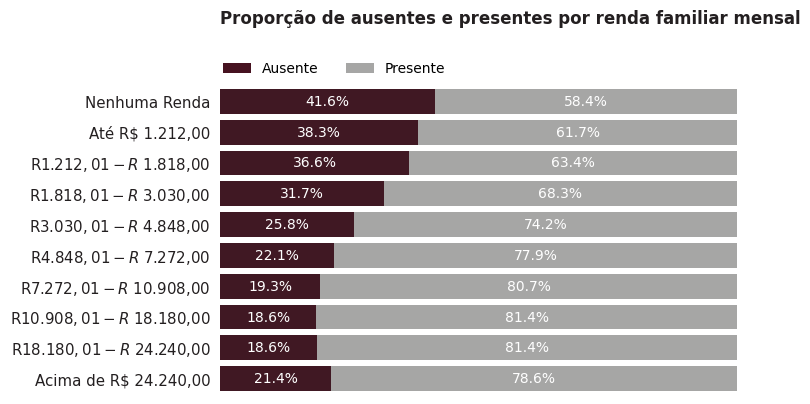

In [91]:
income_absent = absent_df.groupby(['renda_familiar_mensal'])[['presente']].mean().reset_index()
income_absent['ausente'] = 1 - income_absent['presente']
income_absent['income_unique'] = income_absent['renda_familiar_mensal'].apply(lambda x: x[-9:].replace('.', '').replace(',', '') if x != 'Nenhuma Renda' else '0').astype('int')
income_absent = income_absent.sort_values(by=['income_unique', 'renda_familiar_mensal'], ascending=[True, False]).reset_index(drop=True)

order = income_absent['renda_familiar_mensal'].tolist()


horizontal_stacked_bar_plot(income_absent, second_x='presente', first_x='ausente', y='renda_familiar_mensal', y_tick_range=range(len(income_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=order, title='Proporção de ausentes e presentes por renda familiar mensal', title_pad=45, figsize=(7, 4),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.12, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, order=order, text_size=10)

- Sim, a renda familiar mensal influencia o comparecimento do candidato na prova. Claramente, à medida que a renda aumenta, a taxa de abstenção cai.
- Por exemplo, a taxa de abstenção entre candidatos que não possuem nenhuma renda é mais que o dobro da taxa entre aqueles que possuem rendas maiores que 7 mil reais.

#### 7.4 Existe alguma diferença na taxa de abstenção entre as diferentes faixas etárias?

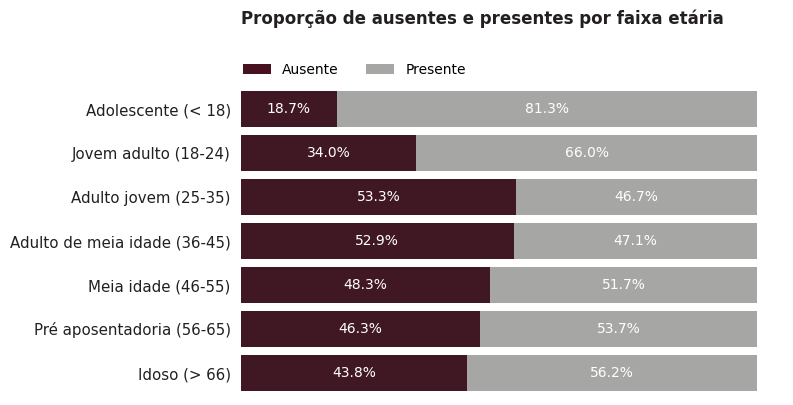

In [92]:
age_absent = absent_df.groupby(['faixa_etaria'])[['presente']].mean().reset_index()
age_absent['ausente'] = 1 - age_absent['presente']
age_absent['limit_age'] = age_absent['faixa_etaria'].apply(lambda x: x[-3:-1]).astype('int')
age_absent = age_absent.sort_values(by=['limit_age'], ascending=True).reset_index(drop=True)

order = age_absent['faixa_etaria'].tolist()

horizontal_stacked_bar_plot(age_absent, second_x='presente', first_x='ausente', y='faixa_etaria', y_tick_range=range(len(age_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=order, title='Proporção de ausentes e presentes por faixa etária', title_pad=45, figsize=(7, 4),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.12, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, order=order, text_size=10)

- Jovens tendem a ter uma taxa de abstenção menor que a de pessoas adultas a idosas.

#### 7.5 Existe alguma diferença na taxa de abstenção entre pessoas do sexo feminino e do sexo masculino?

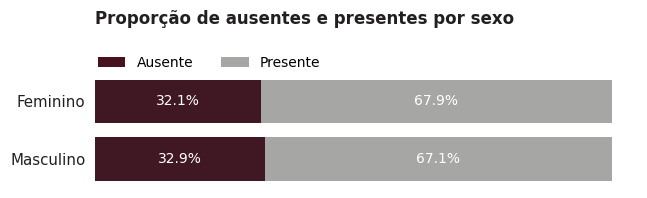

In [93]:
sex_absent = absent_df.groupby(['sexo'])[['presente']].mean().reset_index()
sex_absent['ausente'] = 1 - sex_absent['presente']

horizontal_stacked_bar_plot(sex_absent, second_x='presente', first_x='ausente', y='sexo', y_tick_range=range(len(sex_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=['Feminino', 'Masculino'], title='Proporção de ausentes e presentes por sexo', title_pad=35, figsize=(7, 1.5),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.75, legend_x=0.21, legend_y=1.25, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, text_size=10)

- Não há diferenças significativas nas taxas de abstenção entre pessoas dos sexos masculino e feminino.

#### 7.6 Quais regiões apresentam as maiores e as menores taxas de abstenção?

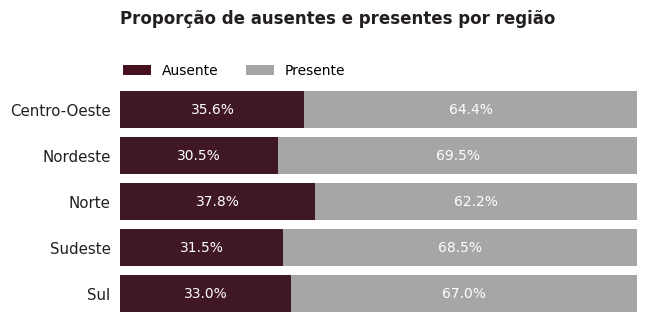

In [94]:
absent_df['regiao'] = define_regions(absent_df['uf_prova'])
region_absent = absent_df.groupby(['regiao'])[['presente']].mean().reset_index()
region_absent['ausente'] = 1 - region_absent['presente']

horizontal_stacked_bar_plot(region_absent, second_x='presente', first_x='ausente', y='regiao', y_tick_range=range(len(region_absent)),
                            second_bar_color=CINZA8, first_bar_color=VERMELHO_FORTE, second_bar_label='Presente', first_bar_label='Ausente',
                            ytick_labels=region_absent['regiao'].unique().tolist(), title='Proporção de ausentes e presentes por região', title_pad=45, figsize=(7, 3),
                            text_color=BRANCO, text_ha='center', text_va='center', bar_width=0.8, legend_x=0.21, legend_y=1.15, first_handle_color=VERMELHO_FORTE,
                            second_handle_color=CINZA8, text_size=10)

- A região norte apresenta a maior taxa de abstenção entre todas. Entretanto, todas as regiões possuem abstenções ao redor de 30-35%. A diferença não é tão expressiva.

#### 7.7 Analisando as taxas de abstenção em outras variáveis

In [12]:
school_absent = absent_df.groupby(['escola'])[['presente']].mean() * 100
school_absent['ausente'] = (100 - school_absent['presente'])
school_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
escola,,
Não respondeu,64.373029,35.626971
Pública,68.968509,31.031491
Privada,92.912999,7.087001


In [14]:
language_absent = absent_df.groupby(['lingua'])[['presente']].mean() * 100
language_absent['ausente'] = (100 - language_absent['presente'])
language_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
lingua,,
Espanhol,62.747036,37.252964
Inglês,71.583657,28.416343


In [15]:
cel_absent = absent_df.groupby(['possui_celular_em_casa'])[['presente']].mean() * 100
cel_absent['ausente'] = (100 - cel_absent['presente'])
cel_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
possui_celular_em_casa,,
Um,57.310447,42.689553
Não,60.422633,39.577367
Dois ou mais,69.940180,30.059820


In [17]:
absent_df['numero_pessoas_em_casa'] = pd.cut(absent_df['numero_pessoas_em_casa'],
                                            bins=[1, 3, 5, 10, 20],
                                            labels=['1 a 3', '4 a 5', '6 a 10', '11 a 20'], include_lowest=True)

home_absent = absent_df.groupby(['numero_pessoas_em_casa'])[['presente']].mean() * 100
home_absent['ausente'] = (100 - home_absent['presente'])
home_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
numero_pessoas_em_casa,,
11 a 20,55.122411,44.877589
6 a 10,62.798649,37.201351
1 a 3,65.248970,34.751030
4 a 5,70.545473,29.454527


In [5]:
treineiro_absent = absent_df.groupby(['treineiro'])[['presente']].mean() * 100
treineiro_absent['ausente'] = (100 - treineiro_absent['presente'])
treineiro_absent.sort_values(by=['ausente'], ascending=False)

,presente,ausente
treineiro,,
Não,65.167961,34.832039
Sim,81.502601,18.497399


#### 8. Conclusão
- Nesta análise exploratória de microdados do ENEM 2022, foram desenvolvidas duas análises:
    - Análise de Desempenho (principal): 
        - Entre os objetivos da Análise de Desmpenho estão, entender qual o perfil dos candidatos que obtêm determinados resultados, quais variáveis se relacionam com a nota geral e como estas poderiam impactar em uma futura tarefa de predição. 
        - Portanto, a métrica em foco foi a nota geral e foram utilizados dados dos alunos que estavam presentes em ambos os dias do ENEM, uma vez que esses recebem um resultado não nulo, evitando assimetrias e distorções.
    - Análise de Abstenção:
        - O objetivo da Análise de Abstenção é identificar os fatores que influenciam a ausência do candidato na prova. 
        - Portanto, foram utilizados dados de todos os candidatos, dando foco aos que estavam ausentes.
- Principais insights obtidos em ambas análises:
    - Ciências da Natureza é a área do conhecimento com o pior desempenho, apresentando uma nota média de 496. Além disso, metade dos alunos obtém um resultado de até 486, ilustrando a dificuldade em tal área. Foi possível observar um resultado geral baixo em todas as áreas. Claramente há uma disparidade entre o que é cobrado na prova e a qualidade da educação nas escolas.
    - Matemática apresenta o melhor desempenho entre as provas objetivas. Entretanto, isso se deve ao modelo do ENEM, que naturalmente atribui maior nota para um número menor de acertos nessa disciplina. 
    - Na redação, observa-se uma performance um pouco melhor no geral, com metade dos alunos obtendo uma nota acima de 640. 
    - A média geral é de 543, enquanto a nota máxima foi de 856.
    - Para ambos os dias, temos uma alta taxa de abstenção. Especialmente, no segundo dia de provas, 32% dos alunos não estavam presentes. Provavelmente, a maioria dessas ausências não se deve a razões randômicas, mas à falta de preparo e/ou confiança dos candidatos.
    - De forma surpreendente, 42% dos candidatos não possuem computador em casa. Além disso, 8% não possuem acesso a internet. Isso cria uma desigualdade de condições e afeta o resultado e a taxa de abstenção. Foi verificado que estudantes que não possuíam esses recursos obtiveram piores resultados e uma taxa de abstenção significativamente maior. Finalmente, metade desses alunos concentra-se na região nordeste do país.
    - Quanto maior a escolaridade do pai ou da mãe, melhor o desempenho do candidato. O mesmo é verdadeiro para a renda.
    - Claramente, à medida que o nível de escolaridade do pai e da mãe aumenta, a taxa de abstenção cai. Por exemplo, analisando a escolaridade da mãe, é possível perceber que a taxa de abstenção entre candidatos cujas mães nunca estudaram é o dobro da taxa para aqueles cujas mães possuem pós graduação.
    - Claramente, à medida que a renda aumenta, a taxa de abstenção cai. Por exemplo, a taxa de abstenção entre candidatos que não possuem nenhuma renda é mais que o dobro da taxa entre aqueles que possuem rendas maiores que 7 mil reais.
    - A região norte apresenta a maior taxa de abstenção entre todas. Entretanto, todas as regiões possuem abstenções ao redor de 30-35%. A diferença não é tão expressiva.